In [1]:
# importing the moduels
import pandas as pd
import requests
import numpy as np
import hvplot.pandas
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
# creating crime data frame
crime_df = pd.read_csv("Resources/Crime_Data_from_2020_to_present.csv")
crime_df.head()



,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
# Map of all crime distribution across LA . Display all the crimes on LA map

la_bounds = (-118.67, 33.70, -118.15, 34.34)
crime_map = crime_df.hvplot.points(
    'LON', 'LAT', 
    geo=True, 
    tiles='OSM', 
    color='blue', 
    size=5, 
    alpha=0.5,
    title='Crime Distribution in Los Angeles (2020-Present)',
    width=600,
    height=400,
    xlim=(la_bounds[0], la_bounds[2]),  # Set longitude bounds
    ylim=(la_bounds[1], la_bounds[3])
)
crime_map

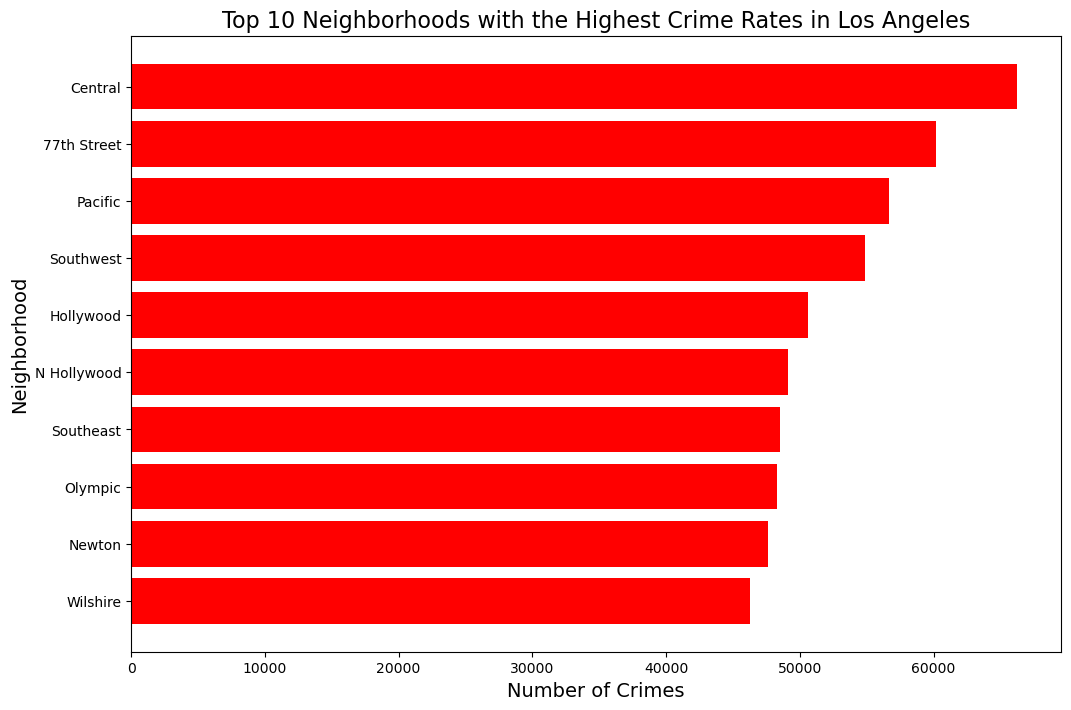

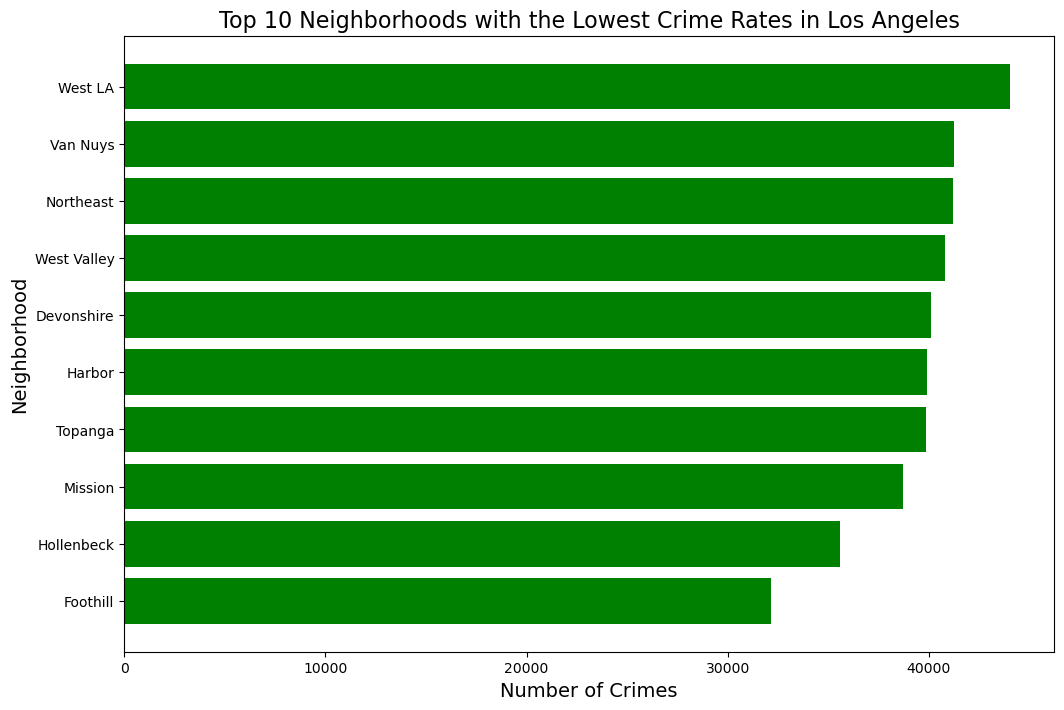

In [7]:
# Top 10 high Crime areas

# Group the data by neighborhood or district (using 'AREA NAME') and count the number of crimes in each area
crime_by_area = crime_df.groupby('AREA NAME').size().reset_index(name='Number of Crimes')

# Sort the data by the number of crimes to identify areas with high and low crime rates
crime_by_area_sorted = crime_by_area.sort_values(by='Number of Crimes', ascending=False)

# Display the top 10 neighborhoods with the highest crime rates
top_10_high_crime_areas = crime_by_area_sorted.head(10)

# Display the top 10 neighborhoods with the lowest crime rates
top_10_low_crime_areas = crime_by_area_sorted.tail(10)

# Plot the top 10 high crime areas
plt.figure(figsize=(12, 8))
plt.barh(top_10_high_crime_areas['AREA NAME'], top_10_high_crime_areas['Number of Crimes'], color='red')
plt.title('Top 10 Neighborhoods with the Highest Crime Rates in Los Angeles', fontsize=16)
plt.xlabel('Number of Crimes', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest crime rate at the top
plt.show()

# Plot the top 10 low crime areas
plt.figure(figsize=(12, 8))
plt.barh(top_10_low_crime_areas['AREA NAME'], top_10_low_crime_areas['Number of Crimes'], color='green')
plt.title('Top 10 Neighborhoods with the Lowest Crime Rates in Los Angeles', fontsize=16)
plt.xlabel('Number of Crimes', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the lowest crime rate at the top
plt.show()

Outlier Neighborhoods with Unusual Crime Rates:
  AREA NAME  Number of Crimes
1   Central             66233


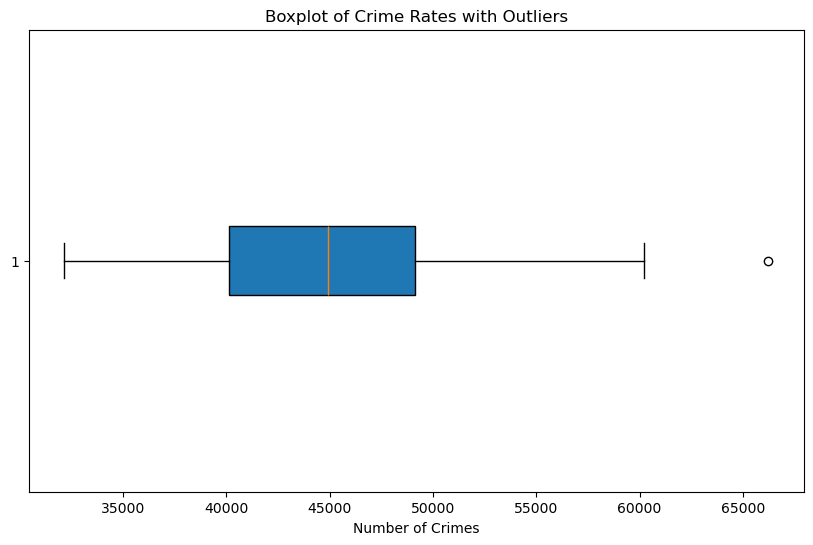

In [8]:
# Find the outliers by area

# Group the data by neighborhood or district (using 'AREA NAME') and count the number of crimes in each area
crime_by_area = crime_df.groupby('AREA NAME').size().reset_index(name='Number of Crimes')

Q1 = crime_by_area['Number of Crimes'].quantile(0.25)
Q3 = crime_by_area['Number of Crimes'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = crime_by_area[(crime_by_area['Number of Crimes'] < (Q1 - 1.5 * IQR)) | 
                         (crime_by_area['Number of Crimes'] > (Q3 + 1.5 * IQR))]

print("Outlier Neighborhoods with Unusual Crime Rates:")
print(outliers)

# Plot outliers on a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(crime_by_area['Number of Crimes'], vert=False, patch_artist=True)
plt.title('Boxplot of Crime Rates with Outliers')
plt.xlabel('Number of Crimes')
plt.show()

Mean Crime Rate: 46045.28571428572
Median Crime Rate: 44946.0
Mode Crime Rate: 32145


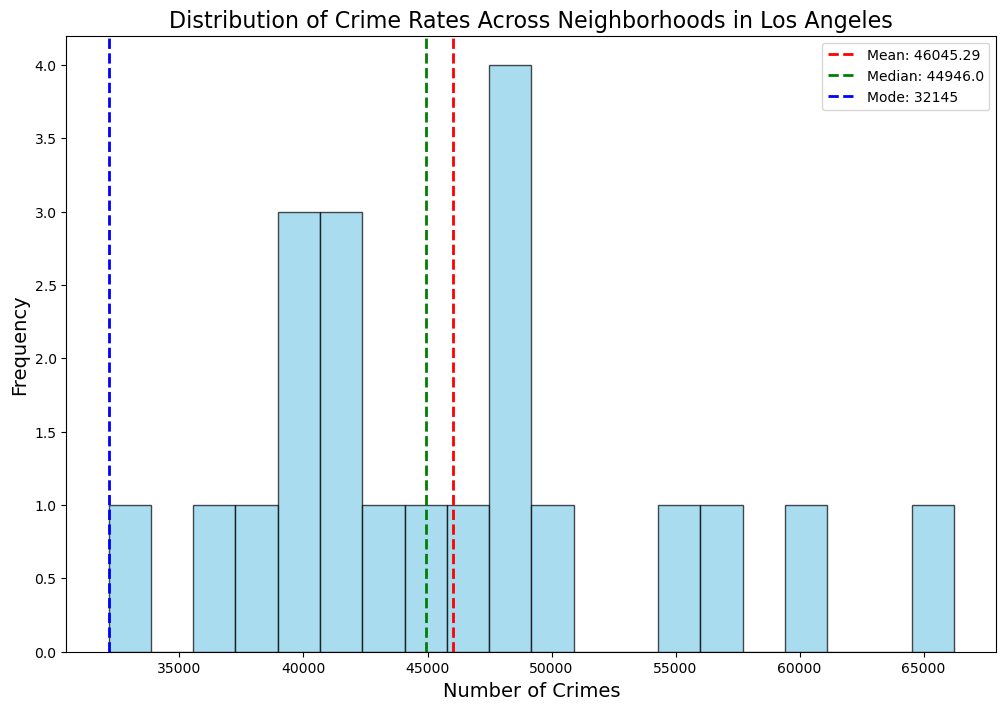


Summary Statistics:
  Statistic         Value
0      Mean  46045.285714
1    Median  44946.000000
2      Mode  32145.000000

Top 5 High Crime Neighborhoods:
     AREA NAME  Number of Crimes
0  77th Street             60222
1      Central             66233
6    Hollywood             50581
8  N Hollywood             49141
9       Newton             47595

Top 5 Low Crime Neighborhoods:
    AREA NAME  Number of Crimes
2  Devonshire             40113
3    Foothill             32145
4      Harbor             39889
5  Hollenbeck             35562
7     Mission             38708


In [9]:
# Calculate mean, median, and mode for the number of crimes in different neighborhoods
mean_crime_rate = crime_by_area['Number of Crimes'].mean()
median_crime_rate = crime_by_area['Number of Crimes'].median()
mode_crime_rate = crime_by_area['Number of Crimes'].mode()[0]  # mode() returns a Series, so take the first element

# Display mean, median, and mode
print(f"Mean Crime Rate: {mean_crime_rate}")
print(f"Median Crime Rate: {median_crime_rate}")
print(f"Mode Crime Rate: {mode_crime_rate}")

# Add lines for mean, median, and mode to a histogram
plt.figure(figsize=(12, 8))
plt.hist(crime_by_area['Number of Crimes'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Plot mean, median, and mode
plt.axvline(mean_crime_rate, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_crime_rate:.2f}')
plt.axvline(median_crime_rate, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_crime_rate}')
plt.axvline(mode_crime_rate, color='blue', linestyle='dashed', linewidth=2, label=f'Mode: {mode_crime_rate}')

# Title and labels
plt.title('Distribution of Crime Rates Across Neighborhoods in Los Angeles', fontsize=16)
plt.xlabel('Number of Crimes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()

# Show the plot
plt.show()

# Summary statistics table
summary_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode'],
    'Value': [mean_crime_rate, median_crime_rate, mode_crime_rate]
})

print("\nSummary Statistics:")
print(summary_stats)

# Identify neighborhoods that are above and below the mean
high_crime_areas = crime_by_area[crime_by_area['Number of Crimes'] > mean_crime_rate]
low_crime_areas = crime_by_area[crime_by_area['Number of Crimes'] < mean_crime_rate]

# Display the top 5 high and low crime neighborhoods
print("\nTop 5 High Crime Neighborhoods:")
print(high_crime_areas.head(5))

print("\nTop 5 Low Crime Neighborhoods:")
print(low_crime_areas.head(5))

In [ ]:
#Demographics(Jesus) - Clean Victim Sex and Age column, create demographic dataframe
demo_crime_df = crime_df.copy()
demo_crime_df.loc[crime_df['Vict Age'] < 0] = 0
demo_crime_df['Vict Sex'] = demo_crime_df['Vict Sex'].replace(['H', '-', 0, 'X' ], 'Unknown')
demo_crime_df['Vict Descent'] = demo_crime_df['Vict Descent'].replace(['-', 0], 'O')

In [ ]:
#Demographics(Jesus) - Create age group columns
size_bins = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150]
labels = ['Under 10', '10-19', '20-29', '30-39', '40-49', '50-59','60-69','70-79','80-89','90-99','Over 100']
demo_crime_df["age range"] = pd.cut(demo_crime_df['Vict Age'],size_bins,labels=labels,right=False)


In [ ]:
#Demographics(Jesus) - Age group count check
age_range_count =  demo_crime_df['age range'].value_counts().sort_index() 
age_range_count

In [ ]:
#Demographics(Jesus) -  Generate a bar plot showing the total number of victms for each age group
# Plot the bar chart
count_chart = age_range_count.plot(kind='bar', figsize=(6,6))
count_chart.set_xlabel("Age groups")
count_chart.set_ylabel("Number of Victims")
count_chart.set_title("Number of Victims by Age Group")
plt.show()

In [ ]:
#Demographics(Jesus) - Pie Chart showing Percentage of Victims by Gender
# Get the unique victims with their gender
gender_count = demo_crime_df.groupby('Vict Sex')['DR_NO'].nunique().sort_values(ascending=False)

# Plot the pie chart
gender_count.plot(kind='pie',autopct="%1.1f%%")
plt.ylabel("Percentage of Victims by Gender")
plt.show()

In [ ]:
#Demographics(Jesus) -  Generate a bar plot showing the total number of victms for each age group by Gender
age_range_count =  demo_crime_df.groupby(['age range', 'Vict Sex']).size().reset_index(name='count') 

pivot_df = age_range_count.pivot(index='age range', columns='Vict Sex', values='count')

# Plot the bar chart
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Age groups")
plt.ylabel("Number of Victims")
plt.title("Number of Victims by Age Group and Gender")
plt.show()

In [ ]:
#Demographics(Jesus) - Define the mapping
replacement_dict = {
    'A': 'Asian',
    'B': 'Black',
    'C': 'Asian',
    'D': 'Asian',
    'F': 'Asian',
    'G': 'Other',
    'H': 'Hispanic/Latino',
    'I': 'Other',
    'J': 'Asian',
    'K': 'Asian',
    'L': 'Asian',
    'O': 'Other',
    'P': 'Other',
    'S': 'Other',
    'U': 'Other',
    'V': 'Asian',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian'
}
demo_crime_df['Vict Descent'] = demo_crime_df['Vict Descent'].replace(replacement_dict)


In [ ]:
#Demographics(Jesus) -  Descent count check
Vict_Descent_count =  demo_crime_df.groupby('Vict Descent').size().reset_index(name='count')
Vict_Descent_count['percentage'] = (Vict_Descent_count['count'] / Vict_Descent_count['count'].sum()) * 100
Vict_Descent_count.sort_values(by='percentage', inplace=True, ascending=False)
Vict_Descent_count

In [ ]:
#Demographics(Jesus) -  Generate a bar plot showing the total number of victms by Ethnicity
# Plot the bar chart
count_chart = Vict_Descent_count.plot(kind='bar', x='Vict Descent', figsize=(6,6))
count_chart.set_xlabel("Ethnic Groups")
count_chart.set_ylabel("Number of victims")
plt.legend().set_visible(False)
plt.title("Number of Victims by Ethnicity")
plt.show()

In [ ]:
#Demographics(Jesus) -  Generate a bar plot showing the total number of victms by Age Group and  Ethnicity
Vict_Descent_count =  demo_crime_df.groupby(['age range','Vict Descent']).size().reset_index(name='count')
pivot_df = Vict_Descent_count.pivot(index='age range', columns='Vict Descent', values='count')
# Plot the bar chart
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title("Number of Victims by Age Group and Ethnicity")
plt.show()

In [ ]:
print("-----------------------")
print("Carl's code starts here")
print("-----------------------")

In [ ]:
# change

In [ ]:
print("----------------------")
print("Carl's code ends here.")
print("----------------------")